# Functions


[Previous](./0-contents.ipynb) | [Next](./2-ML.ipynb)

## What are Functions?

A function takes an input and maps it to an output. It is a 'process' which takes what is passed to it, and outputs some value based on the input. Any particular input must have one corresponding output, but multiple inputs can map to the same output.

For example, a function can take a number, square it, and add one. If you pass in the number 5, the function maps this to 26. 5 only has this one output for this function, but -5 will also be mapped to 26 by the function.

Mathematically this can be written as $f(x) = x^2 + 1$. $f$ is the name of function, $x$ refers to whatever is passed in, and the expression on the right is the instructions for producing the output.

Not all functions can be expressed mathemtaically like this. You might define a function which takes as its input a moment in time, and returns as its output the price of a stock like Apple at a given time. It is a function - there is only one value of the stock at a given time (ignoring some technical details about how stock markets actually work here) - but you can't write a mathematical expression that describes how the datetime is turned into that price value, because to do that you would have to describe the entire universe from beginning to end mathematically.

Note that while you might not be able to write that function mathematically, you might be able to create a second function which is mathematical, and which produces quite similar outputs. This second function is a 'model' of the first, and upon this idea rests most of machine learning.

## Visualising Functions

Where the input and output of a function is numeric, we can visualise the function as a line graph. For example, the function $f(x) = x^2 + 1$ looks like this:

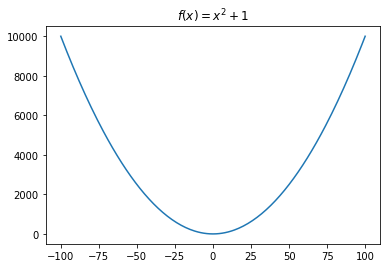

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
f = lambda x: x ** 2 + 1
inputs = [-100 + n for n in range(201)] # -100 to 100 will be passed to the function
outputs = [f(x) for x in inputs]
plt.plot(inputs, outputs)
plt.title("$f(x) = x^2 + 1$")
plt.show()

This is just a visual representation of the same relationship. Non-mathematical functions can be visualised too, as long as their input and output is numeric.

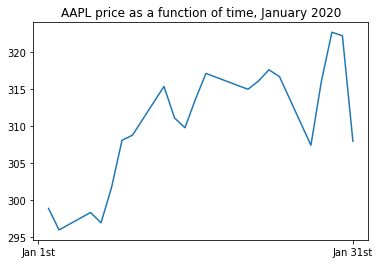

In [2]:
import yfinance as yf
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
ticker = yf.Ticker("AAPL")
data = ticker.history(interval="1d", start="2020-01-01", end="2020-02-01")
days = [date.day for date in data.index]
prices = data.Close
plt.plot(days, prices)
plt.title("AAPL price as a function of time, January 2020")
ticks = plt.xticks([1, 31], ["Jan 1st", "Jan 31st"])
plt.show()

This graphs the function that maps 'date in January 2020' to 'closing price of AAPL stock for that date'. There is no mathematical function that can take that date input (even if expressed as a number, such as number of seconds since 1970) and produce that price, but it is still a function and can still be graphed.

Note that while it is not possible to describe *this* function mathematically, you could create a mathematical function that approximates it.

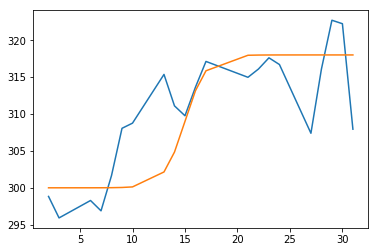

In [3]:
import math
f = lambda day: (18 / (1 + math.exp(-(day - 15)))) + 300
aprox_prices = [f(day) for day in days]
plt.plot(days, prices)
plt.plot(days, aprox_prices)
plt.show()

This plots two functions, which both take the day of the month in January 2020. The first is the same as before, and maps the input to the AAPL price for that day. The second uses the mathematical formula $\frac{18}{1 + e^{-(x - 15)}}$ to approximate the first. It's not perfect, but it's fairly close.

## Propeties of Functions

Some important properties of functions are their range, domain, and whether or not they are continuous.

The domain of a function is the set of values it can take as an input. The AAPL function has the domain of integers between 1 and 31 inclusive. You can't give it a fractional number, as that wouldn't make sense. A mathematical function's domain might be dictated by what it does - the function $f(x) = \frac{1}{x}$ for example cannot have 0 as an input, so its domain is all real numbers except 0.

The range of a function is the set of values it can output based on the domain.

Function continuity is slightly more subtle - tedious to define mathemtaically but straightforward to understand. A function is continuous if there are no breaks in its line, if it does not suddenly jump output values between one input value and an infinitessimally small other input value. A function can be continuous at one region but not in another.

## Multiple Inputs

The functions shown previously took a single input, and mapped them to a single output. However a function can have multiple inputs and map them to multiple outputs - sort of. While a function must map a single input *object* to a single output *object* in order to satisfy the definition of a function, these objects can be lists of values. These lists are vectors.

There is a technical definition of a vector which isn't hugely important at this stage - you can gradually make your internal definition of a vector more complex as you go. For now, they can be thought of as lists of numbers.

In machine learning, you typically deal with functions which take a vector as in input (more than one number) and map it to some single value, called a scalar.

For example, what if you wanted to pass a person to a function, what would that even mean? A function which takes a person as its input and produces a number? A function is a numerical concept and can only deal in numbers really, but you can represent a human as a number, or as more than one number. Their age in years, their weight in kg, and so on. You could have a function which takes a vector of two values - age and weight - and maps it to their average blood sugar.

How do you visusalise a function with more than one input? Well before we used a two-dimensional plot, one dimension to represent the single input value, another to represent the single output value. When there is a vector of two inputs, we need three dimensions - an xy plane to represent the input, and a z-axis above it to show where the output maps to. For example, if you had a function which takes two inputs, multiplies them both, and then adds something to them, such as $f(x, y) = 3x + 2y + 1$, that might look something like this:

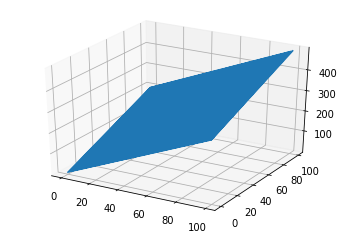

In [4]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
inputs = [[x, y] for x in range(100) for y in range(100)]
f = lambda x, y: (3 * x ) + (2 * y) + 1
xs, ys = zip(*inputs)
outputs = [f(x, y) for x, y in inputs]
plot = ax.plot(xs, ys, outputs)


Two things to note here. Firstly, the vector can be thought of as a position in two-dimensional space, and by extension so can the thing it represents. You can think of all people occupying some position in two-dimensional 'age-weight' space. Secondly, the output of the function can be thought of as a third attribute of them, meaning that the function is turning a two-dimensional vector into a three-dimensional one.

The line/surface/higher-dimensional output of a function (which is always of one fewer dimension than the space it occupies) can be thought of as dividing the output space in two, with those points below it and those above it.

## Types of Function

Mathematical functions can be divided into different types, depending on the kinds of operations they do. One of the most important types of function in machine learning are the linear functions. These are functions which can multiply their inputs by constants, and add/subtract them together if there's more than one input, but nothing more - no raising any of them to a power or doing anything weird like that. They generally take the form $f(x, y, z) = ax + by + cz + n$, for a three dimensional input for example.

When the input is one-dimensional, the output will therefore be in two-dimensional space and the result will be a straight line - for every increase in the input, the output will increase by some fixed proportion. When the input is two-dimensional, the output will create three-dimensional space, and the result will be a flat plane above the input-space.

A linear function is a particular kind of polynomial function, which can raise the inputs to powers.

## Calculus

An important property of a function is its derivative - the derivative is an associated function which takes the same inputs as the original function, and ouputs the rate at which the original function is changing at that input. Graphically it can be thought of as the slope of the line at that input.

For example, with linear functions, the rate of change at any given point is always the same - regardless of the input, a given increase in that input will always correspond to a fixed increase in the output. This is not the case for higher polynomials, which have a varying rate of change.

One of the many uses of calculus is that given an input and the corresponding output, you can use the derivative to work out which direction to go in for the input to decrease or increase the output. Suppose you want to find out what input value produces the smallest output of a function - you pass in 10 to the function and get an output of 100. Which value do you try next? Well the derivative of the function will tell you whether the function is increasing or decreasing at that input, and the magnitude will tell you by how much. If the derivative function produces 20 for example, you know the function will increase if you go higher than 10, because 20 is positive.

This concept will be explored in more depth as gradient descent.